<a href="https://colab.research.google.com/github/rahiakela/introduction-to-time-series-forecasting-with-python/blob/part-1-data-preparation/3_time_series_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

Time series lends itself naturally to visualization. Line plots of observations over time are popular, but there is a suite of other plots that you can use to learn more about your problem. The more you learn about your data, the more likely you are to develop a better forecasting
model. 

We will discover 6 different types of plots that you can use to visualize
time series data with Python.

Ref: https://stackoverflow.com/questions/45156289/pandas-where-is-the-documentation-for-timegrouper


## Time Series Visualization

Visualization plays an important role in time series analysis and forecasting. Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model. A problem is that many novices in the
field of time series forecasting stop with line plots. 

We will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

The focus is on univariate time series, but the techniques are just as applicable to multivariate time series, when you have more than one observation at each time step.

## Minimum Daily Temperatures Dataset

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. The units are in degrees Celsius and there are 3650 observations. 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame

series = pd.read_csv('daily-minimum-temperatures-in-me.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

## Line Plot

The first, and perhaps most popular, visualization for time series is the line plot. In this plot, time is shown on the x-axis with observation values along the y-axis.

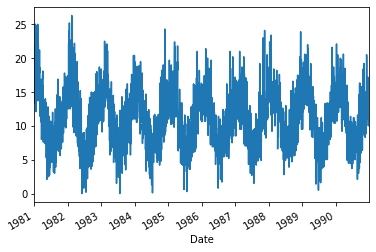

In [2]:
import matplotlib.pyplot as plt

series.astype(float).plot()
plt.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

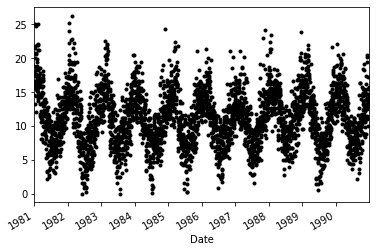

In [3]:
# changing the style of the line to be black dots
series.astype(float).plot(style='k.')
plt.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

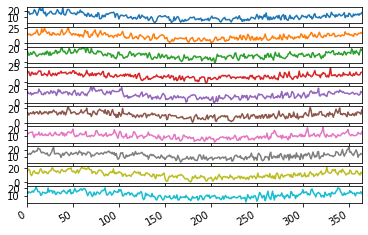

In [11]:
# grouped by year
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

## Histogram and Density Plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution).
This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

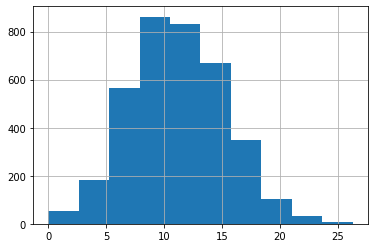

In [4]:
series.hist()

We can get a better idea of the shape of the distribution of observations by using a density plot. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

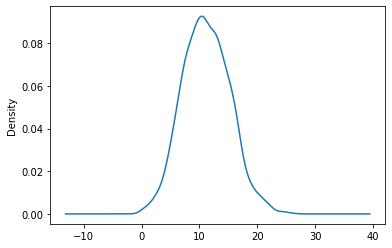

In [5]:
series.plot(kind='kde')

## Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval. Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. 

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for
outliers outside the whiskers or extents of the data.

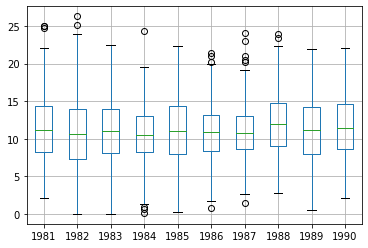

In [10]:
# grouped by year
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.boxplot()
plt.show()

We may also be interested in the distribution of values across months within a year.

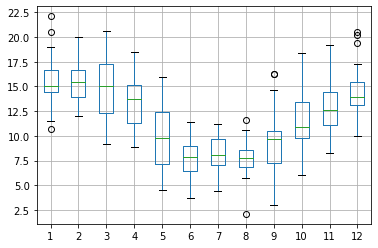

In [13]:
# grouped by month
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1, 13)

months.boxplot()
plt.show()

## Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).
Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

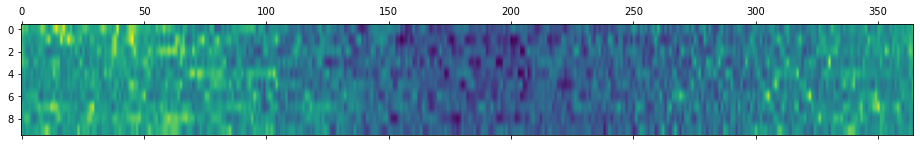

In [15]:
# grouped by year
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

As with the box and whisker plot example above, we can also compare the months within a year.

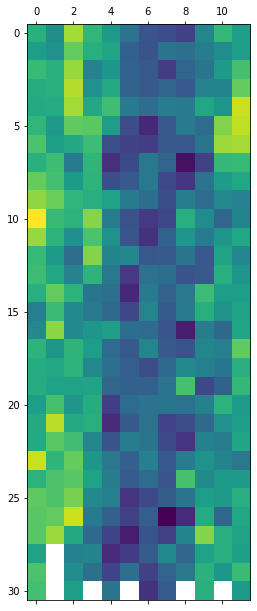

In [16]:
# grouped by month
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1, 13)

plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

## Lag Scatter Plots